In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
df=pd.read_csv('../Data Labeling/twitter_with_label.csv')

In [2]:
df.head()
df_text = df["text"]

In [3]:
df['rating'] = df['rating'].replace(4, 1)

In [4]:
df['rating']

0       1
1       1
2       1
3       1
4       0
       ..
9995    1
9996    0
9997    0
9998    1
9999    1
Name: rating, Length: 10000, dtype: int64

In [4]:
df['rating'].value_counts()

1    5034
0    4966
Name: rating, dtype: int64

<Axes: xlabel='rating', ylabel='count'>

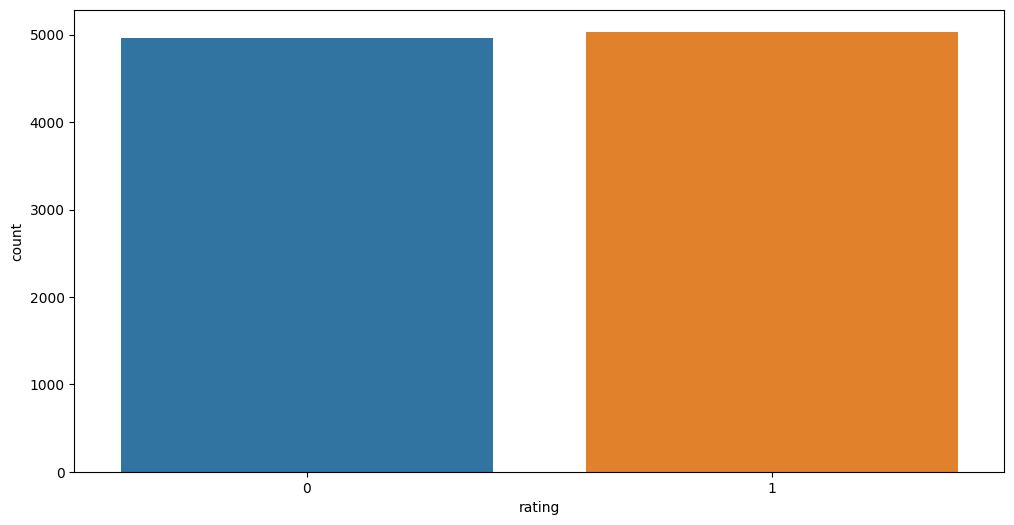

In [5]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.countplot(x='rating', data=df)

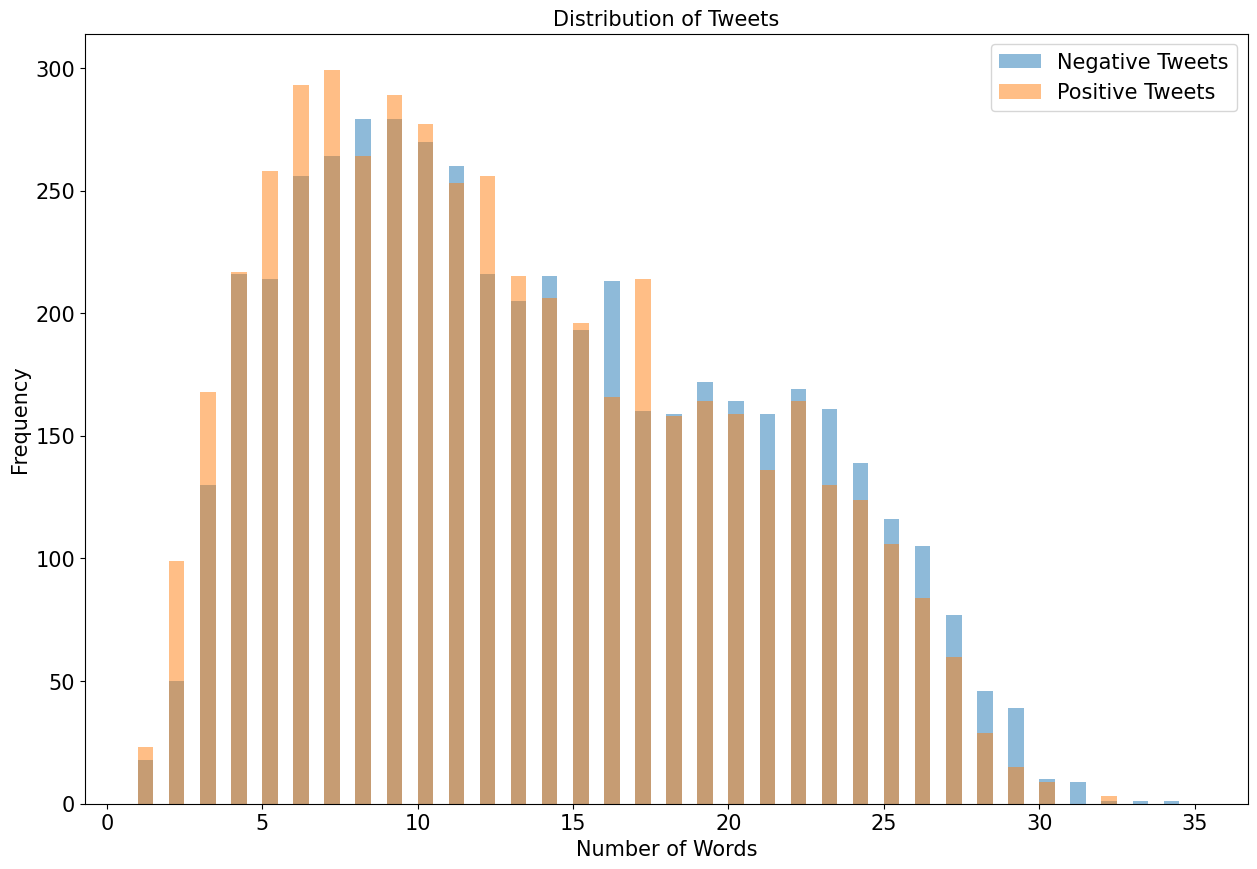

In [6]:
def count_words(text):
    words = text.split()
    return len(words)

word_counts = df['text'].apply(count_words)
neg_tweet = df['text'].loc[df['rating'] == 0]
pos_tweet = df['text'].loc[df['rating'] == 1]

neg_word_counts = neg_tweet.apply(count_words)
pos_word_counts = pos_tweet.apply(count_words)

fig, ax = plt.subplots(figsize=(15,10))
plt.hist(neg_word_counts, bins=range(1, max(word_counts)+2), width=0.5, label = "Negative Tweets", alpha = 0.5)
plt.hist(pos_word_counts, bins=range(1, max(word_counts)+2), width=0.5, label = "Positive Tweets", alpha = 0.5)
plt.title('Distribution of Tweets', fontsize = 15)
plt.xlabel('Number of Words', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.legend(fontsize = 15)
plt.show()

In [7]:
from collections import Counter

words = df['text'].str.split()
word_counts = Counter(word for sentence in words for word in sentence)
top_words = word_counts.most_common(10)

# Print the top 10 most common words
for word, count in top_words:
    print(f'{word}: {count}')

to: 3521
the: 3130
I: 3118
a: 2279
my: 1807
and: 1678
i: 1490
is: 1363
for: 1336
in: 1293


In [35]:
## REMOVE URLs

In [8]:
df_text[25]

'@sunriseon7 http://twitpic.com/3l3zu - Victorian Tourism already did that '

In [9]:
def remove_urls(text):
    #url_pattern = re.compile(r'https?://\S+|www\.\S+')
    url_pattern = re.compile(r'https?://[A-Za-z0-9./]+')
    cleaned_text = re.sub(url_pattern, '', text)
    return cleaned_text


df_text = df_text.apply(remove_urls)
#df['text'][25]

In [10]:
df_text[25]

'@sunriseon7  - Victorian Tourism already did that '

Remove @username

In [11]:
df_text.head()

0    @NZSoulGirl Hey there! Yum...sangria! And snor...
1                 Enjoyed that. Now for Sunday dinner 
2    show was awesome vegas, u made the last night ...
3            @DKA34 Damon welcome to twitter Nation!  
4    @teemwilliams &amp; @dc3plusme: I thought I fo...
Name: text, dtype: object

In [12]:
def remove_username(text):
    return re.sub(r'RT @\w+: |@\w+', '', text)

df_text = df_text.apply(remove_username)

In [13]:
df_text.head()

0     Hey there! Yum...sangria! And snorkeling soun...
1                 Enjoyed that. Now for Sunday dinner 
2    show was awesome vegas, u made the last night ...
3                   Damon welcome to twitter Nation!  
4     &amp; : I thought I found mine but he left me...
Name: text, dtype: object

Replace emoji

In [14]:
import demoji
df_text = df_text.apply(demoji.replace_with_desc)

In [37]:
## Lowercasing

In [15]:
df_text = df_text.str.lower()
df_text

0        hey there! yum...sangria! and snorkeling soun...
1                    enjoyed that. now for sunday dinner 
2       show was awesome vegas, u made the last night ...
3                      damon welcome to twitter nation!  
4        &amp; : i thought i found mine but he left me...
                              ...                        
9995    book 8 of love at stake is coming out march 20...
9996    can't believe i only got 4 days left in my lov...
9997     always   and i then look like a freak always ...
9998     thankies.  i'll never be able to watch the mo...
9999                   that is one very cute cat!!!    d3
Name: text, Length: 10000, dtype: object

In [39]:
## Removing Extra Whitespaces

In [40]:
# def remove_whitespace(text):
#     return  " ".join(text.split())

# for i in range(len(df_text['low_text'])):
#       df_text.loc[i, 'punc_text'] = remove_whitespace(df_text.loc[i, 'low_text'])
# df_text = df_text.drop(columns='low_text')

# #df_text['message']=df_text['message'].apply(remove_whitespace)
# df_text.head()

# df_text = df_text.str.strip()

In [16]:
## remove &amp &quot &lt
df_text = df_text.str.replace('&\S+', '', regex=True)

In [17]:
df_text

0        hey there! yum...sangria! and snorkeling soun...
1                    enjoyed that. now for sunday dinner 
2       show was awesome vegas, u made the last night ...
3                      damon welcome to twitter nation!  
4         : i thought i found mine but he left me for ...
                              ...                        
9995    book 8 of love at stake is coming out march 20...
9996    can't believe i only got 4 days left in my lov...
9997     always   and i then look like a freak always ...
9998     thankies.  i'll never be able to watch the mo...
9999                   that is one very cute cat!!!    d3
Name: text, Length: 10000, dtype: object

Remove Tags

In [18]:
def remove_tag(text):
    return re.sub(r'#\w*', '', text)
df_text = df_text.apply(remove_tag)

In [44]:
### remove punctuations

In [19]:
def remove_punct(text):
    return re.sub(r'[^\w\s]','',text)
df_text = df_text.apply(remove_punct)

In [48]:
### Tokenization

In [20]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
df_text=df_text.apply(lambda X: word_tokenize(X))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jeffan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
df_text

0       [hey, there, yumsangria, and, snorkeling, soun...
1               [enjoyed, that, now, for, sunday, dinner]
2       [show, was, awesome, vegas, u, made, the, last...
3                   [damon, welcome, to, twitter, nation]
4       [i, thought, i, found, mine, but, he, left, me...
                              ...                        
9995    [book, 8, of, love, at, stake, is, coming, out...
9996    [cant, believe, i, only, got, 4, days, left, i...
9997    [always, and, i, then, look, like, a, freak, a...
9998    [thankies, ill, never, be, able, to, watch, th...
9999                 [that, is, one, very, cute, cat, d3]
Name: text, Length: 10000, dtype: object

In [50]:
### spell check

In [22]:
from spellchecker import SpellChecker
spell = SpellChecker()
def spell_check(text):
    result = []
    for word in text:
        correct_word = spell.correction(word)
        result.append(correct_word)
    return result
df_text=df_text.apply(spell_check)
df_text

0       [hey, there, None, and, snorkeling, sounds, am...
1               [enjoyed, that, now, for, sunday, dinner]
2       [show, was, awesome, vegas, u, made, the, last...
3                   [damon, welcome, to, twitter, nation]
4       [i, thought, i, found, mine, but, he, left, me...
                              ...                        
9995    [book, 8, of, love, at, stake, is, coming, out...
9996    [cant, believe, i, only, got, 4, days, left, i...
9997    [always, and, i, then, look, like, a, freak, a...
9998    [hankies, ill, never, be, able, to, watch, the...
9999                 [that, is, one, very, cute, cat, do]
Name: text, Length: 10000, dtype: object

In [88]:
### Lemmatization

In [23]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,pos_tag

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Jeffan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jeffan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Jeffan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [24]:
def lemmatization(text):
    result=[]
    wordnet = WordNetLemmatizer()
    for token,tag in pos_tag(list(filter(None, text))):
        pos=tag[0].lower()
        if pos not in ['a', 'r', 'n', 'v']: 
            pos='n'
        result.append(wordnet.lemmatize(token,pos))
    return result

df_text=df_text.apply(lemmatization)

In [46]:
## remove stop words

In [25]:
nltk.download('stopwords')
from nltk.corpus import stopwords

en_stopwords = stopwords.words('english')

def remove_stopwords(text):
    result = []
    for token in list(filter(None, text)):
        if token not in en_stopwords:
            result.append(token)
    return result
# Apply the remove_stop_words function to each element in the Series
df_text = df_text.apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jeffan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
df_text.head(20)

0               [hey, snorkel, sound, amaze, glad, fun]
1                               [enjoy, sunday, dinner]
2     [show, awesome, vega, u, make, last, night, to...
3                     [damon, welcome, twitter, nation]
4          [think, find, mine, leave, guy, think, well]
5     [actually, say, time, right, eat, hat, guess, ...
6     [try, figure, husband, twitter, class, prove, ...
7     [get, crank, fall, press, try, 7, month, use, ...
8     [back, gym, already, still, try, get, bed, gre...
9     [realise, physic, cancel, today, could, get, h...
10    [come, oh, close, area, great, trip, bro, talk...
11                                           [pleasure]
12                                         [lol, think]
13                                    [overcast, today]
14    [im, late, know, stop, im, tho, eat, play, sim...
15                           [noe, idea, new, mee, lol]
16           [give, park, run, money, 700, good, stuff]
17    [count, hour, till, get, see, 330, five, h

Removing Frequent Words

In [27]:
from nltk import FreqDist

def frequent_words(df):
    lst=[]
    for x in df:
        lst+= x
    fdist=FreqDist(lst)
    return fdist.most_common(10)

freq_words = frequent_words(df_text)

lst = []
for a,b in freq_words:
    lst.append(a)
lst

['get', 'im', 'go', 'day', 'good', 'like', 'work', 'love', 'u', 'dont']

In [28]:
def remove_freq_words(text):
    
    result=[]
    for item in text:
        if item not in lst:
            result.append(item)
    
    return result
    
df_text = df_text.apply(remove_freq_words)

In [29]:
df_text.head()

0              [hey, snorkel, sound, amaze, glad, fun]
1                              [enjoy, sunday, dinner]
2    [show, awesome, vega, make, last, night, tour,...
3                    [damon, welcome, twitter, nation]
4         [think, find, mine, leave, guy, think, well]
Name: text, dtype: object

In [80]:
#df_text.to_csv('spellchecked_tweets.csv')

In [30]:
#put all tokens back as the tidy_tweet
for i in range(len(df_text)):
    df_text[i] = ' '.join(df_text[i])
df['tidy_tweet']=df_text


df.head()

,Unnamed: 0,rating,id,date,flag,user,text,tidy_tweet
0,894059,1,1692137234,Sun May 03 19:21:16 PDT 2009,NO_QUERY,cariquinn,@NZSoulGirl Hey there! Yum...sangria! And snor...,hey snorkel sound amaze glad fun
1,1467016,1,2064555259,Sun Jun 07 06:35:08 PDT 2009,NO_QUERY,Nigel_Derbyfan,Enjoyed that. Now for Sunday dinner,enjoy sunday dinner
2,1150195,1,1978427680,Sat May 30 23:19:31 PDT 2009,NO_QUERY,YoungmoneyReef,"show was awesome vegas, u made the last night ...",show awesome vega make last night tour memorable
3,1274449,1,2000971003,Mon Jun 01 23:28:13 PDT 2009,NO_QUERY,DoreenCotinola,@DKA34 Damon welcome to twitter Nation!,damon welcome twitter nation
4,620938,0,2228589656,Thu Jun 18 14:37:57 PDT 2009,NO_QUERY,tmac_82,@teemwilliams &amp; @dc3plusme: I thought I fo...,think find mine leave guy think well


In [31]:
df.to_csv('cleaned_tweets_with_label.csv')

In [147]:
df['rating'].value_counts()

1    5034
0    4966
Name: rating, dtype: int64

In [148]:
words = df['tidy_tweet'].str.split()
word_counts = Counter(word for sentence in words for word in sentence)
top_words = word_counts.most_common(10)

# Print the top 10 most common words
for word, count in top_words:
    print(f'{word}: {count}')

today: 407
time: 403
cant: 400
know: 393
one: 387
want: 382
make: 367
think: 358
miss: 350
well: 348


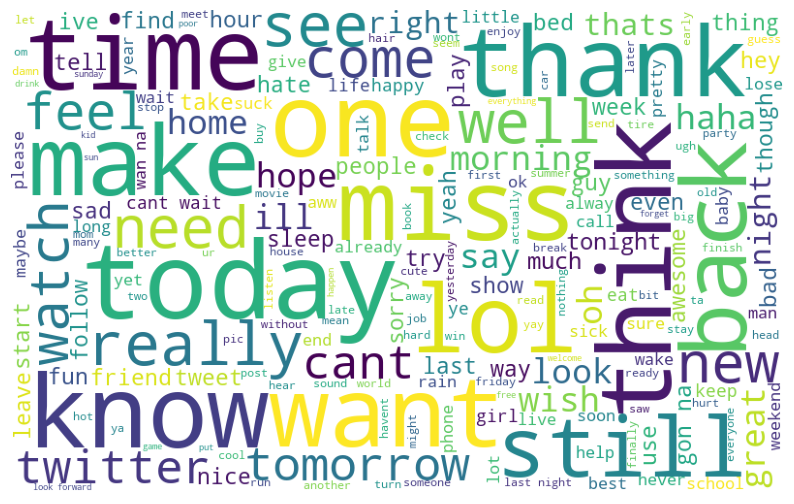

In [149]:
all_words=' '.join([text for text in df['tidy_tweet']])
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud=WordCloud(width=800, height=500, random_state=21,max_font_size=110, background_color="white").generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

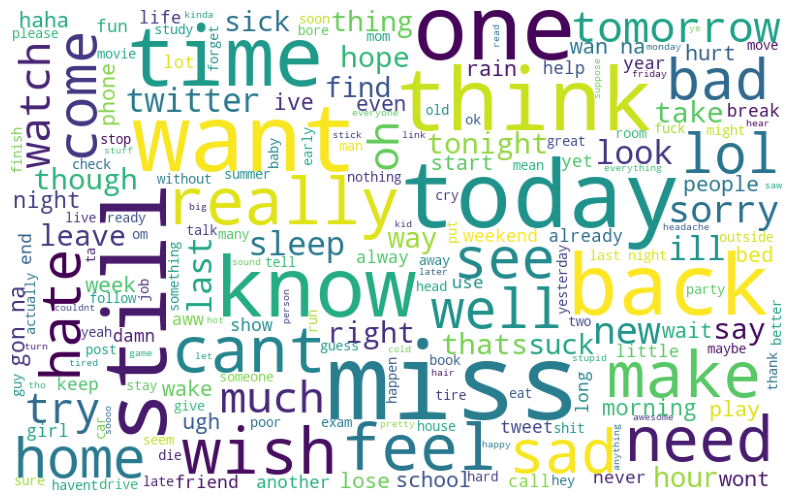

In [154]:
#wordcloud for negative tweets
negative_words=' '.join([text for text in df['tidy_tweet'][df['rating']==0]])
from wordcloud import WordCloud
word_cloud=WordCloud(width=800, height=500, random_state=21,max_font_size=110,background_color="white").generate(negative_words)

plt.figure(figsize=(10, 7))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

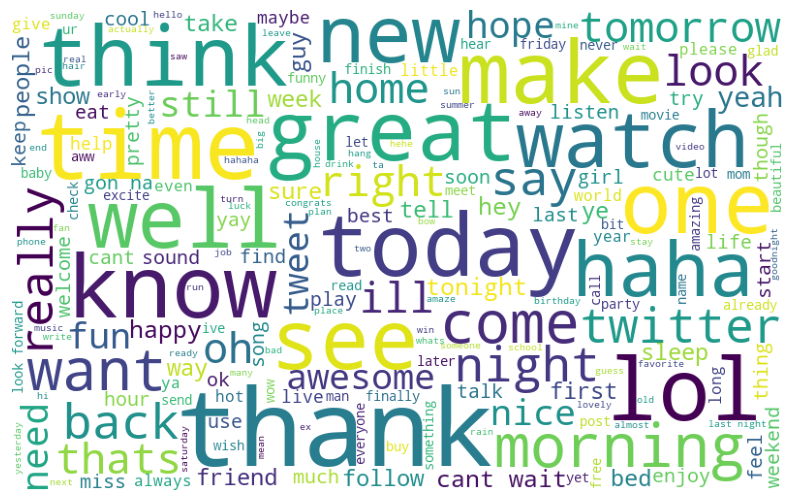

In [151]:
#wordcloud for positive tweets
non_negative_words=' '.join([text for text in df['tidy_tweet'][df['rating']==1]])
from wordcloud import WordCloud
word_cloud=WordCloud(width=800, height=500, random_state=21,max_font_size=110,background_color="white").generate(non_negative_words)

plt.figure(figsize=(10, 7))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

time: 231
thanks: 208
know: 207
see: 189
today: 188
lol: 187
well: 184
make: 183
new: 179
one: 178
great: 169
think: 168
night: 155
cant: 151
watch: 149
wait: 148
come: 147
look: 144
back: 141
haha: 141
morning: 136
say: 136
happy: 128
want: 128
twitter: 124
oh: 120
really: 119
tomorrow: 109
thank: 107
ill: 107


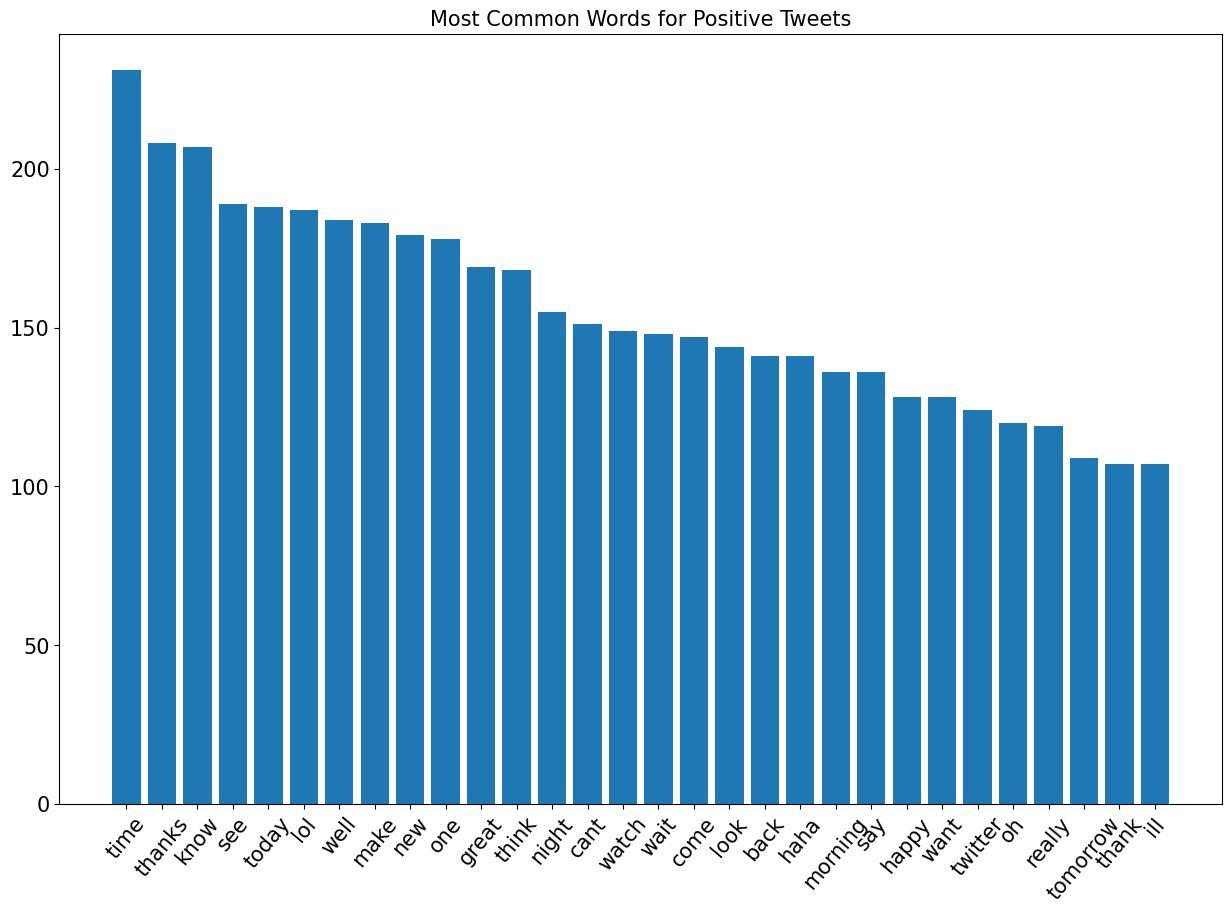

In [155]:
pos_words = df['tidy_tweet'].loc[df['rating'] == 1].str.split()

#words = df['tidy_tweet'].str.split()
word_counts = Counter(word for sentence in pos_words for word in sentence)
top_words = word_counts.most_common(30)

# Print the top 10 most common words
for word, count in top_words:
    print(f'{word}: {count}')

ls_of_words = []
ls_of_num = []
for word in top_words:
    ls_of_words.append(word[0])
    
for num in top_words:
    ls_of_num.append(num[1])
    
fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.xticks(rotation = 50)
plt.bar(ls_of_words, ls_of_num)
plt.title('Most Common Words for Positive Tweets', fontsize = 15)

plt.show()

miss: 292
want: 254
cant: 249
today: 219
feel: 210
one: 209
back: 199
still: 193
think: 190
really: 186
know: 186
make: 184
time: 172
need: 167
well: 164
last: 163
wish: 162
sad: 158
na: 154
home: 153
come: 149
bad: 148
2: 148
see: 147
oh: 135
night: 133
sleep: 133
sorry: 127
lol: 122
look: 119


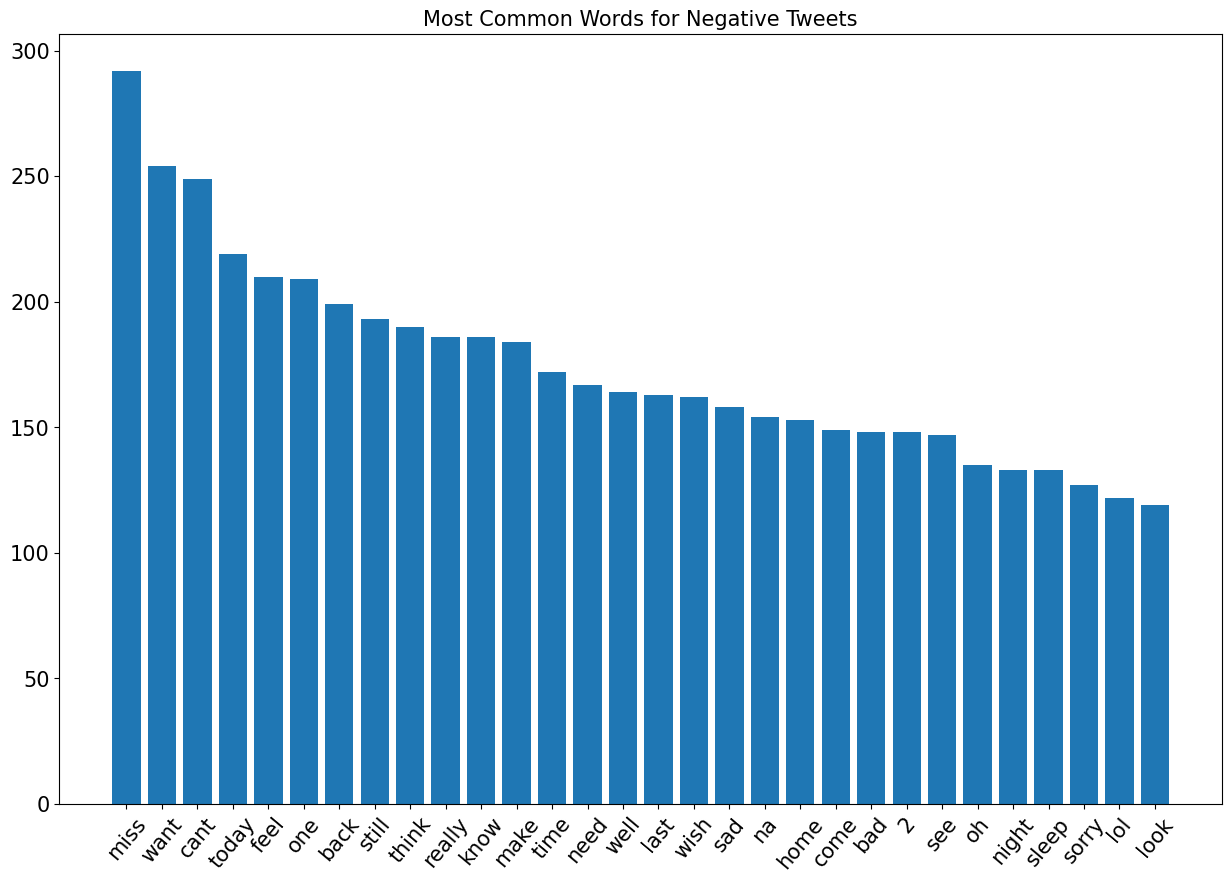

In [159]:
neg_words = df['tidy_tweet'].loc[df['rating'] == 0].str.split()

#words = df['tidy_tweet'].str.split()
word_counts = Counter(word for sentence in neg_words for word in sentence)
top_words = word_counts.most_common(30)

# Print the top 10 most common words
for word, count in top_words:
    print(f'{word}: {count}')

ls_of_words = []
ls_of_num = []
for word in top_words:
    ls_of_words.append(word[0])
    
for num in top_words:
    ls_of_num.append(num[1])
    
fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.xticks(rotation = 50)
plt.bar(ls_of_words, ls_of_num)
plt.title('Most Common Words for Negative Tweets', fontsize = 15)

plt.show()

In [157]:
#bag of word features
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow=bow_vectorizer.fit_transform(df['tidy_tweet'])

bow.shape

(10000, 1000)

In [158]:
df['rating'][:7500]

0       1
1       1
2       1
3       1
4       0
       ..
7495    1
7496    0
7497    1
7498    1
7499    1
Name: rating, Length: 7500, dtype: int64

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

train_bow = bow[:7500,:]
test_bow = bow[7500:,:]

xtrain_bow, xval_bow,ytrain,yval=train_test_split(train_bow,df['rating'][:7500],random_state=42,test_size=0.3)

lr=LogisticRegression()
lr.fit(xtrain_bow,ytrain)

prediction=lr.predict_proba(xval_bow)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

print(confusion_matrix(yval, prediction_int))
print("Accuracy: ", accuracy_score(yval, prediction_int))
print("F1 score: ", f1_score(yval, prediction_int))

[[ 475  629]
 [ 106 1040]]
Accuracy:  0.6733333333333333
F1 score:  0.7388987566607459


C:\Users\Jeffan\AppData\Local\Temp\ipykernel_18876\1332697492.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prediction_int = prediction_int.astype(np.int)


In [161]:
#TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf=tfidf_vectorizer.fit_transform(df['tidy_tweet'])

tfidf.shape

(10000, 1000)

In [162]:
#TF-IDF
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yval.index]

lr.fit(xtrain_tfidf, ytrain)

prediction = lr.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

print(confusion_matrix(yval, prediction_int))
print("Accuracy: ", accuracy_score(yval, prediction_int))
print("F1 score: ", f1_score(yval, prediction_int))

[[ 361  743]
 [  59 1087]]
Accuracy:  0.6435555555555555
F1 score:  0.7305107526881721


C:\Users\Jeffan\AppData\Local\Temp\ipykernel_18876\3546243253.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prediction_int = prediction_int.astype(np.int)


In [161]:
# import gensim
# tokenized_tweet = df['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

# model_w2v = gensim.models.Word2Vec(
#             tokenized_tweet,
#             size=200, # desired no. of features/independent variables 
#             window=5, # context window size
#             min_count=2,
#             sg = 1, # 1 for skip-gram model
#             hs = 0,
#             negative = 10, # for negative sampling
#             workers= 2, # no.of cores
#             seed = 34)

# model_w2v.train(tokenized_tweet, total_examples= len(df['tidy_tweet']), epochs=20)

In [159]:
# pip install gensim

Note: you may need to restart the kernel to use updated packages.
